In [ ]:
#pip install wordcloud

In [39]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.ticker as mtick
from wordcloud import WordCloud, STOPWORDS 


import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set()
plt.rcParams['figure.figsize'] = [10, 5]  # default hor./vert. size of plots, in inches
plt.rcParams['lines.markeredgewidth'] = 1  # to fix issue with seaborn box plots; needed after import seaborn
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
df_aba_sent = pd.read_csv('df_aba_sent.csv')
df_root_sent = pd.read_csv("df_root_sent.csv")
df_aba_sent.drop(['Unnamed: 0'], axis=1, inplace=True)
df_root_sent.drop(['Unnamed: 0'], axis=1, inplace=True)

In [17]:
df_aba_sent.loc[df_aba_sent['our_sent']=='minor_positive_change', 'our_sent']='Positive change'
df_aba_sent.loc[df_aba_sent['our_sent']=='minor_negative_change', 'our_sent']='Negative change'
df_aba_sent.loc[df_aba_sent['our_sent']=='positive_change', 'our_sent']='Positive change'
df_aba_sent.loc[df_aba_sent['our_sent']=='negative_change', 'our_sent']='Negative change'
df_aba_sent.loc[df_aba_sent['our_sent']=='no_change', 'our_sent']='No change'

In [34]:
airlines = {'KLM':56377143, 
            'AirFrance': 106062176, 
            'British_Airways': 18332190, 
            'AmericanAir': 22536055, 
           'Lufthansa': 124476322, 
           'AirBerlin': 26223583, 
           'AirBerlinAssist': 2182373406, 
           'easyJet': 38676903, 
           'RyanAir': 1542862735, 
           'SingaporeAir': 253340062, 
           'Qantas': 218730857, 
           'EtihadAirways': 45621423, 
           'VirginAtlantic': 20626359}

# Root conversations visualizations and analysis

In [41]:
# KLM
klm_root_tweets = df_root_sent[(df_root_sent["user_id_str"] == 56377143) & (df_root_sent["root_level"] == 1)]
list_tid_klm_root = klm_root_tweets["id_str"]

df_replies_to_klm = df_root_sent[(df_root_sent["root_id"].isin(list_tid_klm_root)) & (df_root_sent["root_level"] == 2)]

average_nr_of_replies_to_klm = len(df_replies_to_klm) / len(klm_root_tweets)
negative_nr_of_replies_klm = len(df_replies_to_klm[df_replies_to_klm["our_sent"] == "negative"])
positive_nr_of_replies_klm = len(df_replies_to_klm[df_replies_to_klm["our_sent"] == "positive"])
neutral_nr_of_replies_klm = len(df_replies_to_klm[df_replies_to_klm["our_sent"] == "neutral"])

total_volume_klm = (len(klm_root_tweets), int(round(average_nr_of_replies_to_klm, 0)))
response_time_klm = list()
for index, row in klm_root_tweets.iterrows():
    time_root = row["timestamp_ms"]
    tid = row["id_str"]
    response_time_klm.append(((df_replies_to_klm[df_replies_to_klm["root_id"] == tid]["timestamp_ms"] - time_root) / 3600000).mean())

df_response_time_klm = pd.DataFrame(response_time_klm)
df_response_time_klm = df_response_time_klm[(df_response_time_klm[0] < 168.629028)]


1973

In [5]:
# British Airways
brit_root_tweets = df_root_sent[(df_root_sent["user_id_str"] == 18332190) & (df_root_sent["root_level"] == 1)]
list_tid_brit_root = brit_root_tweets["id_str"]

df_replies_to_brit = df_root_sent[(df_root_sent["root_id"].isin(list_tid_brit_root)) & (df_root_sent["root_level"] == 2)]

average_nr_of_replies_to_brit = len(df_replies_to_brit) / len(brit_root_tweets)
negative_nr_of_replies_brit = len(df_replies_to_brit[df_replies_to_brit["our_sent"] == "negative"])
positive_nr_of_replies_brit = len(df_replies_to_brit[df_replies_to_brit["our_sent"] == "positive"])
neutral_nr_of_replies_brit = len(df_replies_to_brit[df_replies_to_brit["our_sent"] == "neutral"])

response_time_brit = list()
for index, row in brit_root_tweets.iterrows():
    time_root = row["timestamp_ms"]
    tid = row["id_str"]
    response_time_brit.append(((df_replies_to_brit[df_replies_to_brit["root_id"] == tid]["timestamp_ms"] - time_root) / 3600000).mean())

df_response_time_brit = pd.DataFrame(response_time_brit)
df_response_time_brit = df_response_time_brit[(df_response_time_brit[0] < 514.501246)]

In [6]:
# Lufthansa
luft_root_tweets = df_root_sent[(df_root_sent["user_id_str"] == 124476322) & (df_root_sent["root_level"] == 1)]
list_tid_luft_root = luft_root_tweets["id_str"]

df_replies_to_luft = df_root_sent[(df_root_sent["root_id"].isin(list_tid_luft_root)) & (df_root_sent["root_level"] == 2)]

average_nr_of_replies_to_luft = len(df_replies_to_luft) / len(luft_root_tweets)
negative_nr_of_replies_luft = len(df_replies_to_luft[df_replies_to_luft["our_sent"] == "negative"])
positive_nr_of_replies_luft = len(df_replies_to_luft[df_replies_to_luft["our_sent"] == "positive"])
neutral_nr_of_replies_luft = len(df_replies_to_luft[df_replies_to_luft["our_sent"] == "neutral"])

response_time_luft = list()
for index, row in luft_root_tweets.iterrows():
    time_root = row["timestamp_ms"]
    tid = row["id_str"]
    response_time_luft.append(((df_replies_to_luft[df_replies_to_luft["root_id"] == tid]["timestamp_ms"] - time_root) / 3600000).mean())

df_response_time_luft = pd.DataFrame(response_time_luft)
df_response_time_luft = df_response_time_luft[(df_response_time_luft[0] < 262.004936)]

In [7]:
# RyanAir
ra_root_tweets = df_root_sent[(df_root_sent["user_id_str"] == 1542862735) & (df_root_sent["root_level"] == 1)]
list_tid_ra_root = ra_root_tweets["id_str"]

df_replies_to_ra = df_root_sent[(df_root_sent["root_id"].isin(list_tid_ra_root)) & (df_root_sent["root_level"] == 2)]

average_nr_of_replies_to_ra = len(df_replies_to_ra) / len(ra_root_tweets)
negative_nr_of_replies_ra = len(df_replies_to_ra[df_replies_to_ra["our_sent"] == "negative"])
positive_nr_of_replies_ra = len(df_replies_to_ra[df_replies_to_ra["our_sent"] == "positive"])
neutral_nr_of_replies_ra = len(df_replies_to_ra[df_replies_to_ra["our_sent"] == "neutral"])

response_time_ra = list()
for index, row in ra_root_tweets.iterrows():
    time_root = row["timestamp_ms"]
    tid = row["id_str"]
    response_time_ra.append(((df_replies_to_ra[df_replies_to_ra["root_id"] == tid]["timestamp_ms"] - time_root) / 3600000).mean())

df_response_time_ra = pd.DataFrame(response_time_ra)
df_response_time_ra = df_response_time_ra[(df_response_time_ra[0] < 47.780104)]

In [8]:
df_response_time_klm["airline"] = "KLM"
df_response_time_brit["airline"] = "British Airways"
df_response_time_luft["airline"] = "Lufthansa"
df_response_time_ra["airline"] = "Ryanair"

df_every_airline = pd.concat([df_response_time_klm, df_response_time_brit, df_response_time_luft, df_response_time_ra])

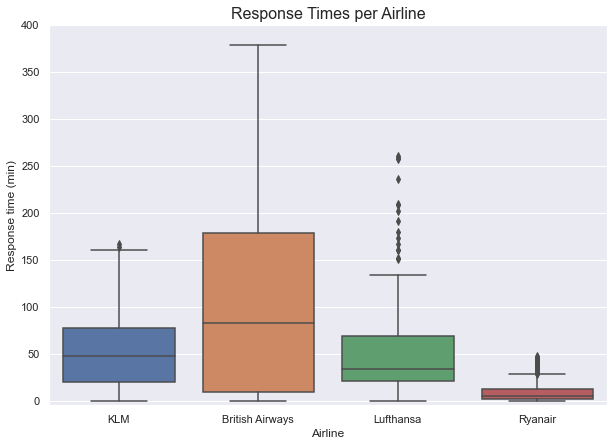

In [9]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.boxplot(data=df_every_airline, x="airline", y=0, ax=ax)
ax.set_ylabel("Response time (min)")
ax.set_xlabel("Airline")
ax.set_ylim(-5, 400)
ax.set_title("Response Times per Airline", size=16);   



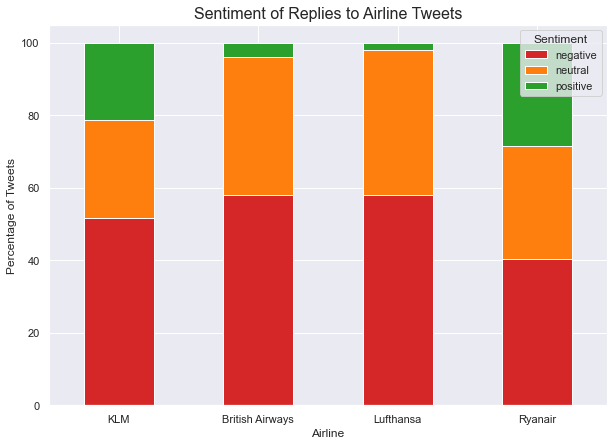

In [63]:
percentage_negative_klm = negative_nr_of_replies_klm / len(df_replies_to_klm) * 100
percentage_positive_klm = positive_nr_of_replies_klm / len(df_replies_to_klm) * 100
percentage_neutral_klm = neutral_nr_of_replies_klm / len(df_replies_to_klm) * 100

percentage_negative_brit = negative_nr_of_replies_brit / len(df_replies_to_brit) * 100
percentage_positive_brit = positive_nr_of_replies_brit / len(df_replies_to_brit) * 100
percentage_neutral_brit = neutral_nr_of_replies_brit / len(df_replies_to_brit) * 100

percentage_negative_luft = negative_nr_of_replies_luft / len(df_replies_to_luft) * 100
percentage_positive_luft = positive_nr_of_replies_luft / len(df_replies_to_luft) * 100
percentage_neutral_luft = neutral_nr_of_replies_luft / len(df_replies_to_luft) * 100

percentage_negative_ra = negative_nr_of_replies_ra / len(df_replies_to_ra) * 100
percentage_positive_ra = positive_nr_of_replies_ra / len(df_replies_to_ra) * 100
percentage_neutral_ra = neutral_nr_of_replies_ra / len(df_replies_to_ra) * 100

percentage_sent_replies = pd.DataFrame(data={"Sentiment": ["negative", "neutral", "positive"],
                                            "KLM": [percentage_negative_klm, percentage_neutral_klm, percentage_positive_klm],
                                            "British Airways": [percentage_negative_brit, percentage_neutral_brit, percentage_positive_brit],
                                            "Lufthansa": [percentage_negative_luft, percentage_neutral_luft, percentage_positive_luft],
                                            "Ryanair": [percentage_negative_ra, percentage_neutral_ra, percentage_positive_ra]
                                        })
#percentage_sent_replies
fig, ax = plt.subplots(figsize=(10, 7))
sns.set()
percentage_sent_replies.set_index('Sentiment').T.plot(kind='bar', stacked=True, color=["#d62728", "#ff7f0e", "#2ca02c"], ax=ax)
ax.set_title("Sentiment of Replies to Airline Tweets", size=16)
ax.set_ylabel("Percentage of Tweets")
ax.set_xlabel("Airline")
for tick in ax.get_xticklabels():
    tick.set_rotation(0);

In [10]:
total_volume_df = pd.DataFrame(data={"Airline": ["KLM", "British Airways", "Lufthansa", "Ryanair"], 
                                         "Number of root tweets": [len(klm_root_tweets), len(brit_root_tweets), len(luft_root_tweets), len(ra_root_tweets)], 
                                         "Average number of replies per conversation": [int(round(average_nr_of_replies_to_klm, 0)), int(round(average_nr_of_replies_to_brit, 0)), int(round(average_nr_of_replies_to_luft, 0)), int(round(average_nr_of_replies_to_ra, 0))]
                                    })
total_volume_df

,Airline,Number of root tweets,Average number of replies per conversation
0,KLM,148,26
1,British Airways,83,129
2,Lufthansa,159,14
3,Ryanair,999,19


# A-B-A conversations visualizations and analysis

## Proportion of categories of change in sentiment per airline

In [18]:
df_aba = df_aba_sent[df_aba_sent['aba_level'] == 2]
df_aba_klm = df_aba[df_aba['user_id_str'] == 56377143]
df_aba_brit = df_aba[df_aba['user_id_str'] == 18332190]
df_aba_ryan = df_aba[df_aba['user_id_str'] == 1542862735]
df_aba_luft = df_aba[df_aba['user_id_str'] == 124476322]

In [19]:
#Changing data into countable variables

data_klm = {'Positive change': df_aba_klm['our_sent'][df_aba_klm['our_sent'] == 'Positive change'].count(),
        'No change': df_aba_klm['our_sent'][df_aba_klm['our_sent'] == 'No change'].count(),
        'Negative change': df_aba_klm['our_sent'][df_aba_klm['our_sent'] == 'Negative change'].count()}

change_klm = list(data_klm.keys())
value_klm = list(data_klm.values())


data_brit = {'Positive change': df_aba_brit['our_sent'][df_aba_brit['our_sent'] == 'Positive change'].count(),
        'No change': df_aba_brit['our_sent'][df_aba_brit['our_sent'] == 'No change'].count(),
        'Negative change': df_aba_brit['our_sent'][df_aba_brit['our_sent'] == 'Negative change'].count()}

change_brit = list(data_brit.keys())
value_brit = list(data_brit.values())


data_ryan = {'Positive change': df_aba_ryan['our_sent'][df_aba_ryan['our_sent'] == 'Positive change'].count(),
        'No change': df_aba_ryan['our_sent'][df_aba_ryan['our_sent'] == 'No change'].count(),
        'Negative change': df_aba_ryan['our_sent'][df_aba_ryan['our_sent'] == 'Negative change'].count()}

change_ryan = list(data_ryan.keys())
value_ryan = list(data_ryan.values())


data_luft = {'Positive change': df_aba_luft['our_sent'][df_aba_luft['our_sent'] == 'Positive change'].count(),
        'No change': df_aba_luft['our_sent'][df_aba_luft['our_sent'] == 'No change'].count(),
        'Negative change': df_aba_luft['our_sent'][df_aba_luft['our_sent'] == 'Negative change'].count()}

change_luft = list(data_luft.keys())
value_luft = list(data_luft.values())

In [101]:
aba_total={'British Airways':sum(value_brit),
'KLM':sum(value_klm),
'Lufthansa':sum(value_luft),
'Ryanair':sum(value_ryan)}

In [118]:
def vis_magic(df: 'DataFrame', airline: 'str'):
    
    new_df = df['our_sent'].value_counts(normalize=True)
    new_df = new_df.mul(100).rename('Percent').reset_index()

    g = sns.catplot(x='index', y='Percent', kind='bar', data=new_df, palette=sns.color_palette(["#ff7f0e",  "#2ca02c","#d62728"]))
    g.ax.set_xlabel(airline)
    g.ax.set_ylim(0,65)
    for p in g.ax.patches:
        txt = '        ' + str(p.get_height().round(1)) + '%'
        txt_x = p.get_x()
        txt_y = p.get_height() + 1
        g.ax.text(txt_x,txt_y,txt)

        current_width = p.get_width()
        diff = current_width - 0.7

        # we change the bar width
        p.set_width(0.7)

        # we recenter the bar
        p.set_x(p.get_x() + diff * .5)
    g.ax.legend(labels= ['Total ABA conversations for '+airline+' : '+ str(aba_total[airline])])
        


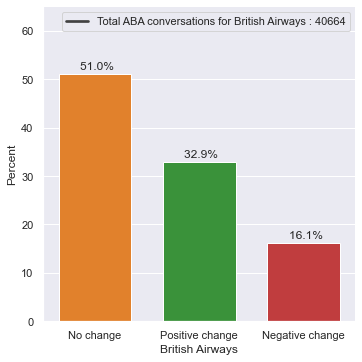

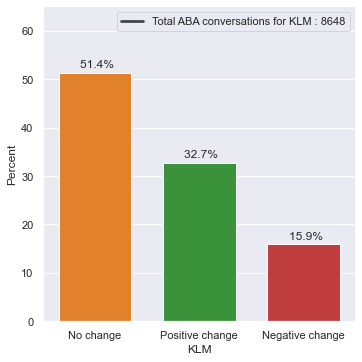

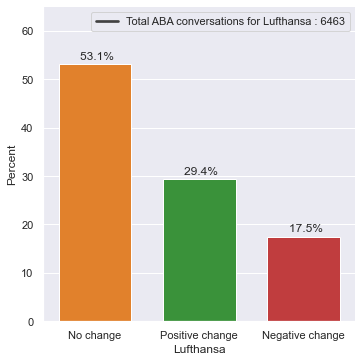

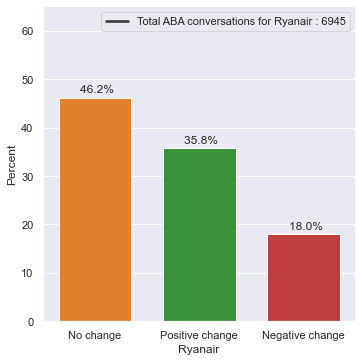

In [119]:
 vis_magic(df_aba_brit, 'British Airways'),vis_magic(df_aba_klm, 'KLM'), vis_magic(df_aba_luft, 'Lufthansa'), vis_magic(df_aba_ryan,'Ryanair');

## Response time per category of change in sentiment

In [29]:
response_list1=[]

for aba_id, data in df_aba_sent.groupby("aba_id"): 
    aba_group = df_aba_sent[df_aba_sent["aba_id"] == aba_id]
    
    for level, row in aba_group.groupby("aba_level"): 
        if level==1:
            time1=int(row['timestamp_ms'])
        elif level==2:
            time2=int(row['timestamp_ms'])
    response_list1.append(time2-time1)

In [30]:
response_list2=[]

for i in response_list1:
    response_list2.append(int(round((i/(1000*60))%60,0)))

In [31]:
df_aba_sent.loc[df_aba_sent['aba_level']==2,'timestamp_ms'] = response_list2

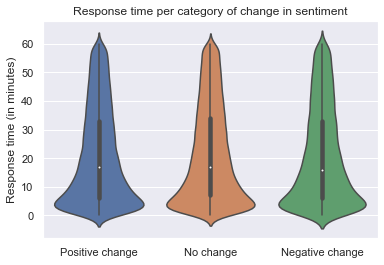

In [33]:
plot = sns.violinplot(data=df_aba_sent[df_aba_sent['aba_level']==2], x='our_sent', y='timestamp_ms')
plot.set_ylabel('Response time (in minutes)')
plot.set_xlabel('')
plot.set_title('Response time per category of change in sentiment');

# Word cloud

In [35]:
change_list=[]
for aba_id, data in df_aba_sent.groupby("aba_id"): 
    aba_group = df_aba_sent[df_aba_sent["aba_id"] == aba_id]
    
    for level, row in aba_group.groupby("aba_level"):
        if level==2:
            for i in range(aba_group.shape[0]):
                change_list.append(int(row['user_id_str']))

In [36]:
df_aba_sent.loc[:,'airline_id'] = change_list

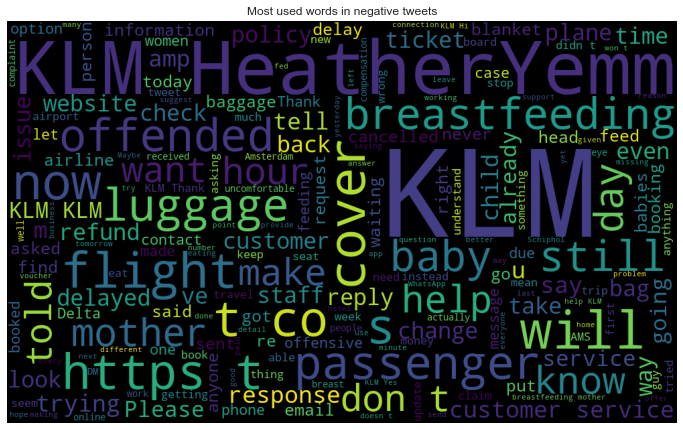

In [40]:
neg_sent = df_aba_sent[(df_aba_sent['our_sent']=='negative') & (df_aba_sent['airline_id']==airlines['KLM'])]
neg_words = ''.join([text for text in neg_sent['full_text']])
 
bad_words = ['food', 'time', 'hour', 'wait', 'miss', 'suck','fuck','shit','seat','loud','fix','line','lost','lose','bag','talk',
             'flew','call','fast','slow','pay','long','care','shame','', 'KLM', 'https', 'airport', 'another', 'Amsterdam','airline', 'someone','flying',
            'people', 'answer', 'nothing','flight','need', 'please', 'see','give','ask','without','company','you','u','really','DM','problem','fly','amp','Amsterdam','think','K L M','klm',
             '@KLM','Heather Yemm','don\'t','\s','one','http','KLM\'s']

final_list = [word for word in neg_words.split() if word not in bad_words]
neg_words = ' '.join([word for word in final_list])
    
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1000,
                      height=600
                     ).generate(neg_words)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most used words in negative tweets')
plt.show()

# The end!